<a href="https://colab.research.google.com/github/Amine-Guesmi/mini_projet_RN/blob/main/mini_projet_tenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np 
import imghdr

In [ ]:
data_dir = '/content/drive/MyDrive/MINI_PROJET_AI_PYTORCH/dataset/test' 
image_exts = ['jpeg','jpg', 'bmp', 'png']
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)


In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/MINI_PROJET_AI_PYTORCH/dataset/train/",
                                          target_size = (200, 200),
                                          batch_size = 32,
                                          class_mode = 'binary'
                                        )

test_dataset = train.flow_from_directory("/content/drive/MyDrive/MINI_PROJET_AI_PYTORCH/dataset/test/",
                                          target_size = (200, 200),
                                          batch_size = 32,
                                          class_mode = 'binary'
                                        )

Found 7657 images belonging to 3 classes.
Found 3370 images belonging to 3 classes.


In [ ]:
train_dataset.class_indices

{'Normal': 0, 'benign': 1, 'malignant': 2}

In [ ]:
train_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape =(200, 200, 3)), tf.keras.layers.MaxPool2D(2,2), #
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),#
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),#
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation = 'relu'),#
                                    tf.keras.layers.Dense(1, activation='sigmoid')
                                    ])

In [ ]:
from tensorflow.python import metrics
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr=0.001), metrics = ["accuracy"])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


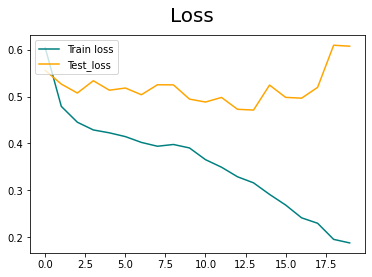

In [4]:
fig = plt.figure()
plt.plot([model_fit.history['loss']], color='teal', label='loss')
plt.plot(model_fit.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

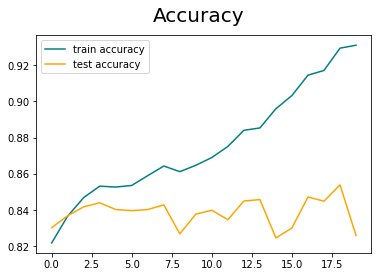

In [5]:
fig = plt.figure()
plt.plot(model_fit.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_fit.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

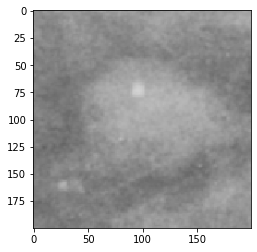

1/1 [==============================] - 0s 17ms/step
9234.png
Normal


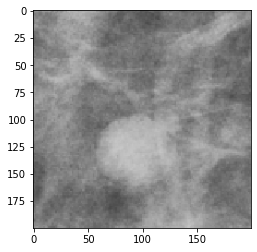

1/1 [==============================] - 0s 48ms/step
9237.png
benign


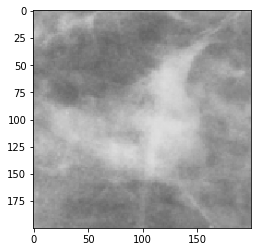

1/1 [==============================] - 0s 33ms/step
9233.png
Normal


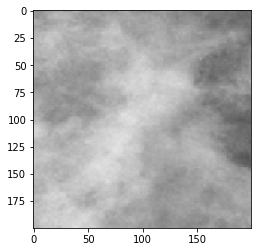

1/1 [==============================] - 0s 26ms/step
9238.png
benign


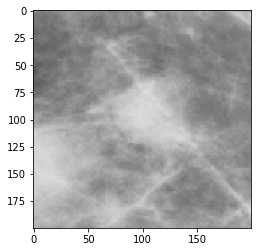

1/1 [==============================] - 0s 19ms/step
9236.png
Normal


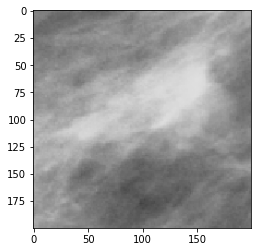

1/1 [==============================] - 0s 19ms/step
9235.png
Normal


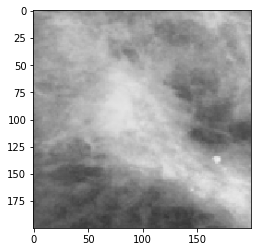

1/1 [==============================] - 0s 19ms/step
10122.png
Normal


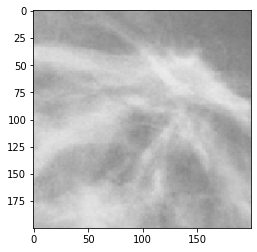

1/1 [==============================] - 0s 19ms/step
10121.png
benign


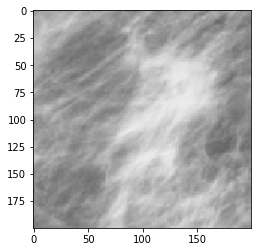

1/1 [==============================] - 0s 15ms/step
10124.png
benign


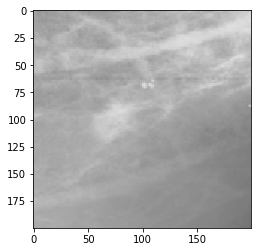

1/1 [==============================] - 0s 14ms/step
10125.png
Normal


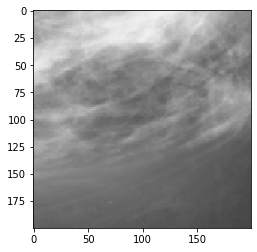

1/1 [==============================] - 0s 21ms/step
10126.png
Normal


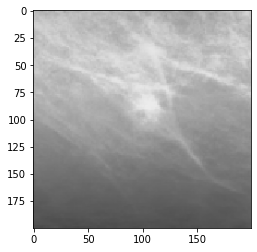

1/1 [==============================] - 0s 19ms/step
10123.png
Normal


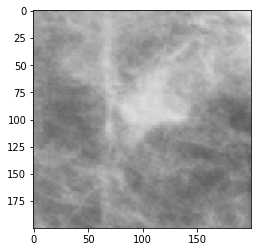

1/1 [==============================] - 0s 18ms/step
24.png
Normal


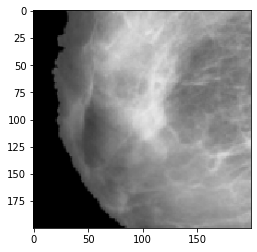

1/1 [==============================] - 0s 17ms/step
25.png
Normal


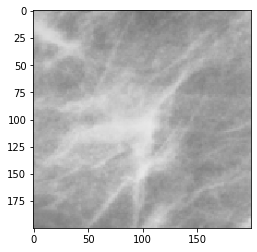

1/1 [==============================] - 0s 17ms/step
19.png
Normal


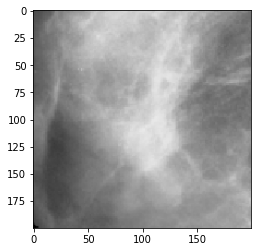

1/1 [==============================] - 0s 16ms/step
18.png
Normal


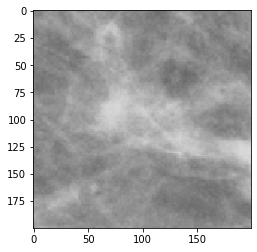

1/1 [==============================] - 0s 14ms/step
23.png
Normal


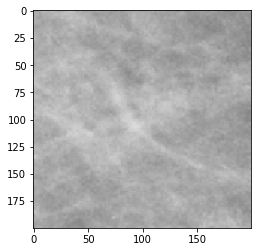

1/1 [==============================] - 0s 20ms/step
22.png
Normal


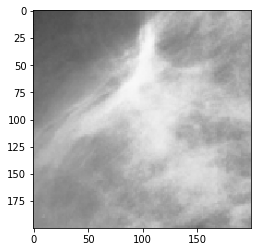

1/1 [==============================] - 0s 18ms/step
20.png
benign


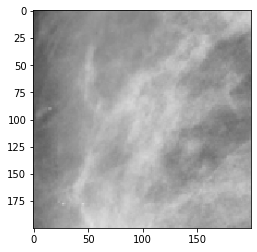

1/1 [==============================] - 0s 19ms/step
21.png
Normal


In [ ]:
from tensorflow.keras.preprocessing import image
dir_path = "/content/drive/MyDrive/MINI_PROJET_AI_PYTORCH/dataset_test/pred"
for i in os.listdir(dir_path):
  img = image.load_img(dir_path+'//'+i, target_size = (200,200))
  plt.imshow(img)
  plt.show()
  X= image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)
  images = np.vstack([X])
  val = model.predict(images)
  print(i)
  if(val == 0):
    print("Normal")
  elif(val == 1):
    print("benign")
  else:
    print("malignant")

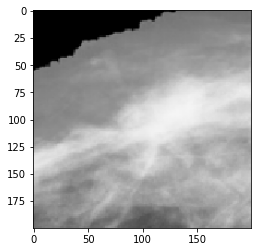

1/1 [==============================] - 0s 18ms/step
[[0.]]


In [ ]:
img = image.load_img("/content/drive/MyDrive/MINI_PROJET_AI_PYTORCH/dataset/train/benign/9321.png", target_size = (200,200))
plt.imshow(img)
plt.show()
X= image.img_to_array(img)
X = np.expand_dims(X, axis = 0)
images = np.vstack([X])
val = model.predict(images)
print(val)

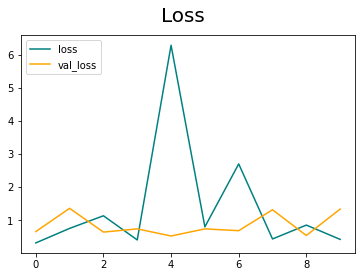

In [ ]:
fig = plt.figure()
plt.plot(model_fit.history['loss'], color='teal', label='loss')
plt.plot(model_fit.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()


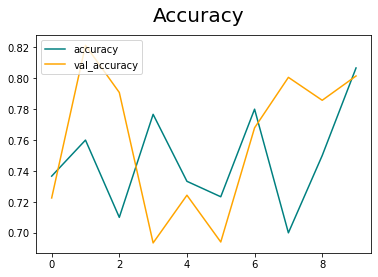

In [ ]:
fig = plt.figure()
plt.plot(model_fit.history['accuracy'], color='teal', label='accuracy')
plt.plot(model_fit.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/MINI_PROJET_AI_PYTORCH/models/','CNN_tensorflow.M1'))

In [ ]:
new_model = load_model('/content/drive/MyDrive/MINI_PROJET_AI_PYTORCH/models/CNN_tensorflow.M1')